In [1]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default = "plotly_white"

LOADING THE DATASET

In [22]:
# Read Excel file into a pandas DataFrame
df = pd.read_excel(r"C:\Users\lenovo\Downloads\superstore_sales.xlsx")
print(df)


              order_id order_date  ship_date       ship_mode  \
0         AG-2011-2040 2011-01-01 2011-01-06  Standard Class   
1        IN-2011-47883 2011-01-01 2011-01-08  Standard Class   
2         HU-2011-1220 2011-01-01 2011-01-05    Second Class   
3      IT-2011-3647632 2011-01-01 2011-01-05    Second Class   
4        IN-2011-47883 2011-01-01 2011-01-08  Standard Class   
...                ...        ...        ...             ...   
51285   CA-2014-115427 2014-12-31 2015-01-04  Standard Class   
51286     MO-2014-2560 2014-12-31 2015-01-05  Standard Class   
51287   MX-2014-110527 2014-12-31 2015-01-02    Second Class   
51288   MX-2014-114783 2014-12-31 2015-01-06  Standard Class   
51289   CA-2014-156720 2014-12-31 2015-01-04  Standard Class   

          customer_name      segment             state        country  market  \
0       Toby Braunhardt     Consumer       Constantine        Algeria  Africa   
1           Joseph Holt     Consumer   New South Wales      Australia

In [23]:
#Display the DataFrame
df.head()

order_id order_date  ship_date       ship_mode    customer_name  \
0     AG-2011-2040 2011-01-01 2011-01-06  Standard Class  Toby Braunhardt   
1    IN-2011-47883 2011-01-01 2011-01-08  Standard Class      Joseph Holt   
2     HU-2011-1220 2011-01-01 2011-01-05    Second Class    Annie Thurman   
3  IT-2011-3647632 2011-01-01 2011-01-05    Second Class     Eugene Moren   
4    IN-2011-47883 2011-01-01 2011-01-08  Standard Class      Joseph Holt   

       segment            state    country  market   region  ...  \
0     Consumer      Constantine    Algeria  Africa   Africa  ...   
1     Consumer  New South Wales  Australia    APAC  Oceania  ...   
2     Consumer         Budapest    Hungary    EMEA     EMEA  ...   
3  Home Office        Stockholm     Sweden      EU    North  ...   
4     Consumer  New South Wales  Australia    APAC  Oceania  ...   

          category sub_category                 product_name    sales  \
0  Office Supplies      Storage          Tenex Lockers, Blue  408.300   
1  Office Supplies     Supplies     Acme Trimmer, High Speed  120.366   
2  Office Supplies      Storage      Tenex Box, Single Width   66.120   
3  Office Supplies        Paper  Enermax Note Cards, Premium   44.865   
4        Furniture  Furnishings   Eldon Light Bulb, Duo Pack  113.670   

   quantity  discount   profit  shipping_cost  order_priority  year  
0         2       0.0  106.140          35.46          Medium  2011  
1         3       0.1   36.036           9.72          Medium  2011  
2         4       0.0   29.640           8.17            High  2011  
3         3       0.5  -26.055           4.82            High  2011  
4         5       0.1   37.770           4.70          Medium  2011  

[5 rows x 21 columns]

In [24]:
# Last five rows of the dataset
df.tail()

order_id order_date  ship_date       ship_mode     customer_name  \
51285  CA-2014-115427 2014-12-31 2015-01-04  Standard Class        Erica Bern   
51286    MO-2014-2560 2014-12-31 2015-01-05  Standard Class         Liz Preis   
51287  MX-2014-110527 2014-12-31 2015-01-02    Second Class  Charlotte Melton   
51288  MX-2014-114783 2014-12-31 2015-01-06  Standard Class     Tamara Dahlen   
51289  CA-2014-156720 2014-12-31 2015-01-04  Standard Class     Jill Matthias   

         segment             state        country  market   region  ...  \
51285  Corporate        California  United States      US     West  ...   
51286   Consumer  Souss-Massa-Draâ        Morocco  Africa   Africa  ...   
51287   Consumer           Managua      Nicaragua   LATAM  Central  ...   
51288   Consumer         Chihuahua         Mexico   LATAM    North  ...   
51289   Consumer          Colorado  United States      US     West  ...   

              category sub_category  \
51285  Office Supplies      Binders   
51286  Office Supplies      Binders   
51287  Office Supplies       Labels   
51288  Office Supplies       Labels   
51289  Office Supplies    Fasteners   

                                          product_name   sales  quantity  \
51285  Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl  13.904         2   
51286          Wilson Jones Hole Reinforcements, Clear   3.990         1   
51287           Hon Color Coded Labels, 5000 Label Set  26.400         3   
51288           Hon Legal Exhibit Labels, Alphabetical   7.120         1   
51289                              Bagged Rubber Bands   3.024         3   

       discount   profit  shipping_cost  order_priority  year  
51285       0.2   4.5188          0.890          Medium  2014  
51286       0.0   0.4200          0.490          Medium  2014  
51287       0.0  12.3600          0.350          Medium  2014  
51288       0.0   0.5600          0.199          Medium  2014  
51289       0.2  -0.6048          0.170          Medium  2014  

[5 rows x 21 columns]

In [25]:
 # Shape of the dataset
df.shape

(51290, 21)

In [26]:
# Columns present in the dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [27]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [28]:
# Checking missing values
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [29]:
 # Generating descriptive statistics summary
df.describe().round()

order_date                      ship_date    sales  \
count                          51290                          51290  51290.0   
mean   2013-05-11 21:26:49.155780864  2013-05-15 20:42:42.745174528    246.0   
min              2011-01-01 00:00:00            2011-01-03 00:00:00      0.0   
25%              2012-06-19 00:00:00            2012-06-23 00:00:00     31.0   
50%              2013-07-08 00:00:00            2013-07-12 00:00:00     85.0   
75%              2014-05-22 00:00:00            2014-05-26 00:00:00    251.0   
max              2014-12-31 00:00:00            2015-01-07 00:00:00  22638.0   
std                              NaN                            NaN    488.0   

       quantity  discount   profit  shipping_cost     year  
count   51290.0   51290.0  51290.0        51290.0  51290.0  
mean        3.0       0.0     29.0           26.0   2013.0  
min         1.0       0.0  -6600.0            0.0   2011.0  
25%         2.0       0.0      0.0            3.0   2012.0  
50%         3.0       0.0      9.0            8.0   2013.0  
75%         5.0       0.0     37.0           24.0   2014.0  
max        14.0       1.0   8400.0          934.0   2014.0  
std         2.0       0.0    174.0           57.0      1.0

0.4 EXPLORATORY DATA ANALYSIS
1. WHAT IS THE OVERALL SALES TREND?

In [30]:
# Getting month year from order_date
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [31]:
print(df['month_year'].unique())
print(df['month_year'].dtype)

['2011-01' '2011-02' '2011-03' '2011-04' '2011-05' '2011-06' '2011-07'
 '2011-08' '2011-09' '2011-10' '2011-11' '2011-12' '2012-01' '2012-02'
 '2012-03' '2012-04' '2012-05' '2012-06' '2012-07' '2012-08' '2012-09'
 '2012-10' '2012-11' '2012-12' '2013-01' '2013-02' '2013-03' '2013-04'
 '2013-05' '2013-06' '2013-07' '2013-08' '2013-09' '2013-10' '2013-11'
 '2013-12' '2014-01' '2014-02' '2014-03' '2014-04' '2014-05' '2014-06'
 '2014-07' '2014-08' '2014-09' '2014-10' '2014-11' '2014-12']
object


In [32]:
# Group by 'month_year' and sum 'sales'
df_temp = df.groupby('month_year')['sales'].sum().reset_index()

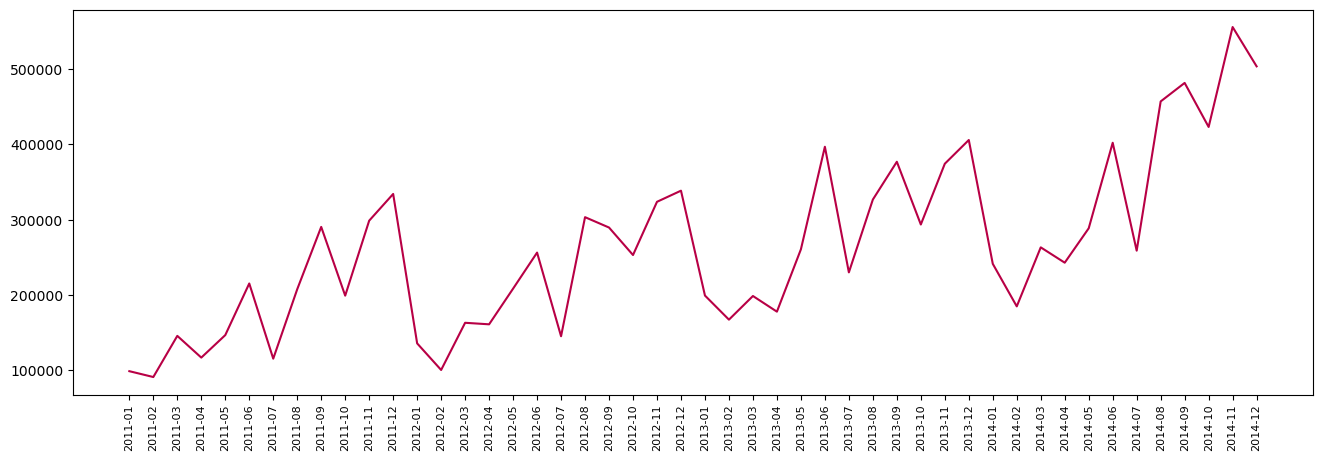

In [33]:
# Setting the figure size
plt.figure(figsize=(16, 5))
plt.plot(df_temp['month_year'], df_temp['sales'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

• Highest Sales in the month of November in 2014
>2. SALES BY CATEGORY

In [35]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'month_year'],
      dtype='object')

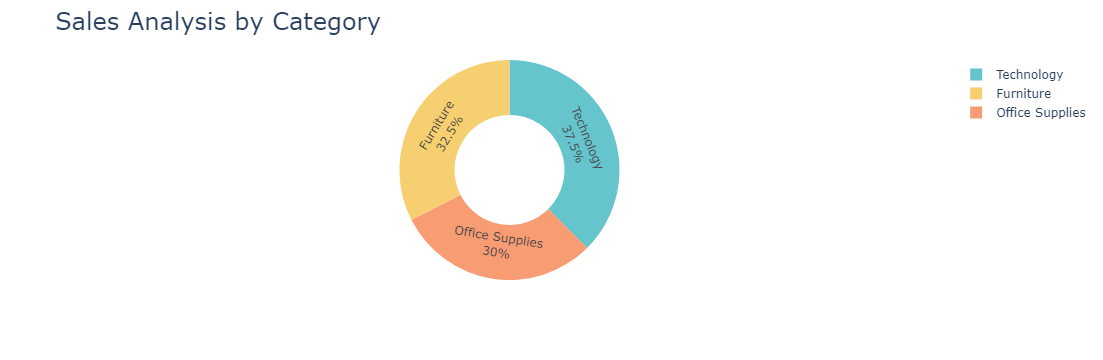

In [41]:
 sales_by_category = df.groupby('category')['sales'].sum().reset_index()
fig = px.pie(sales_by_category,
values='sales',
names='category',
hole=0.5,color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by Category',
title_font=dict(size=24))
fig.show()

# Technology has highest sale.
3. SALES BY SUB CATEGORY

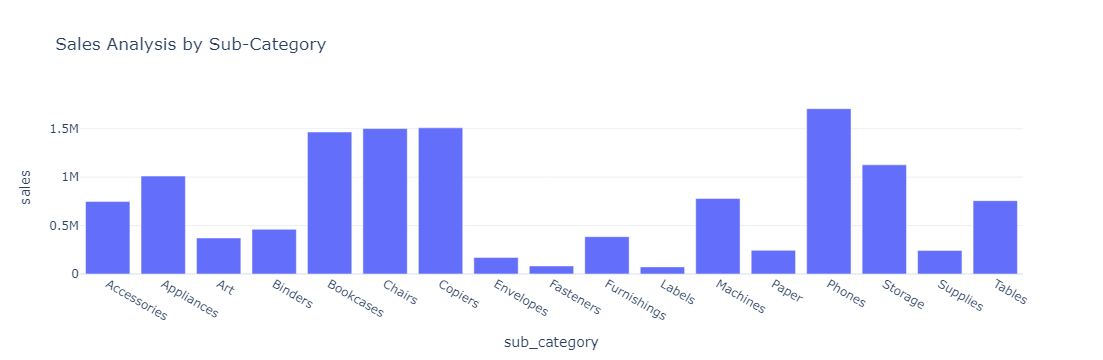

In [42]:
 sales_by_subcategory = df.groupby('sub_category')['sales'].sum().reset_index()
fig = px.bar(sales_by_subcategory,
x='sub_category',
y='sales',
title='Sales Analysis by Sub-Category')
fig.show()

# • Phones has highest sales
4. MONTHLY PROFITS

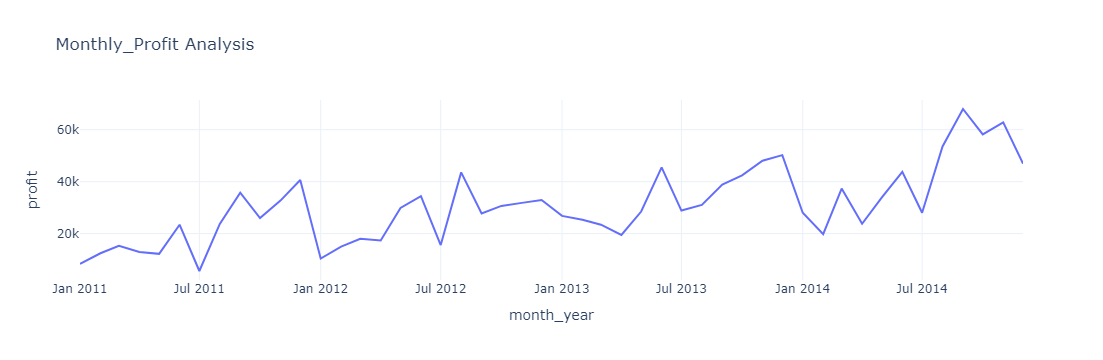

In [45]:
 profit_by_month = df.groupby('month_year')['profit'].sum().reset_index()
fig = px.line(profit_by_month, x='month_year', y='profit', title='Monthly_Profit Analysis')
fig.show()

# 5. PROFIT BY CATEGORY

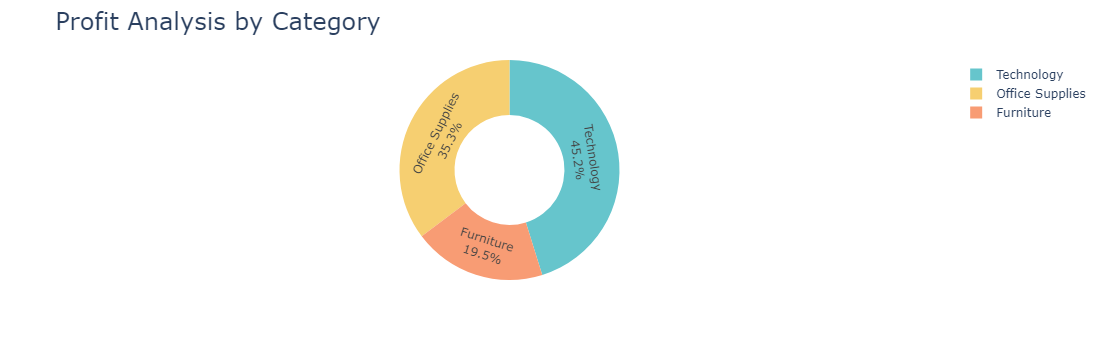

In [49]:
profit_by_category = df.groupby('category')['profit'].sum().reset_index()
fig = px.pie(profit_by_category,
values='profit',
names='category',
hole=0.5,
color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Profit Analysis by Category',
title_font=dict(size=24))
fig.show()

# Technology has highest profit.
6. PROFIT BY SUB-CATEGORY

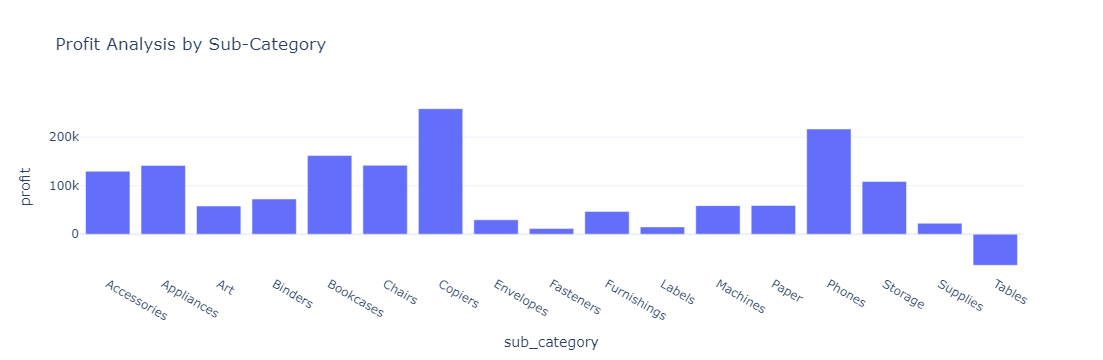

In [51]:
 profit_by_subcategory = df.groupby('sub_category')['profit'].sum().reset_index()
fig = px.bar(profit_by_subcategory, x='sub_category',
y='profit',
title='Profit Analysis by Sub-Category')
fig.show()

# Copiers has highest profit.
7. PROFIT ANALYSIS BY CUSTOMER SEGMENTS

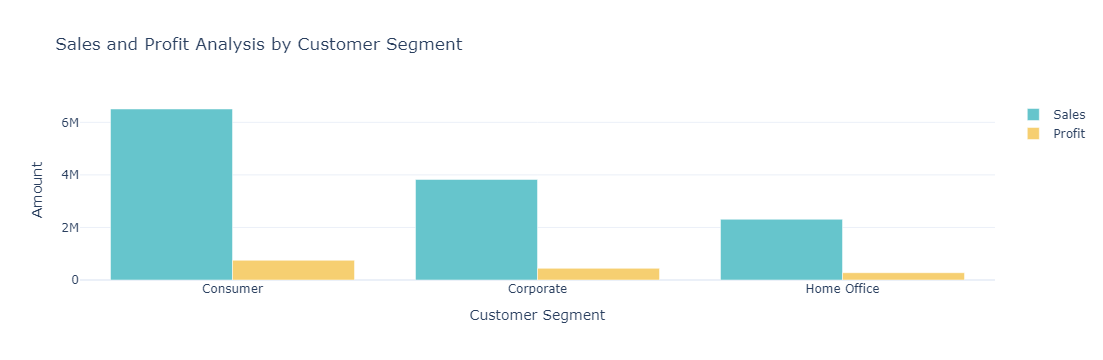

In [52]:
sales_profit_by_segment = df.groupby('segment').agg({'sales': 'sum', 'profit':
'sum'}).reset_index()
color_palette = colors.qualitative.Pastel
fig = go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_segment['segment'],
y=sales_profit_by_segment['sales'],
name='Sales',
marker_color=color_palette[0]))
fig.add_trace(go.Bar(x=sales_profit_by_segment['segment'],
y=sales_profit_by_segment['profit'],
name='Profit',
marker_color=color_palette[1]))
fig.update_layout(title='Sales and Profit Analysis by Customer Segment',
xaxis_title='Customer Segment', yaxis_title='Amount')
fig.show()

8. SALES TO PROFIT RATIO

In [59]:
sales_profit_by_segment = df.groupby('segment').agg({'sales': 'sum', 'profit':'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] =sales_profit_by_segment['sales'] / sales_profit_by_segment['profit']
print(sales_profit_by_segment[['segment', 'Sales_to_Profit_Ratio']])

       segment  Sales_to_Profit_Ratio
0     Consumer               8.686070
1    Corporate               8.637804
2  Home Office               8.338550


# The store has higher profits from the product sales for consumers.
9. WHICH ARE THE TOP 10 PRODUCTS BY SALES?

In [63]:
# Grouping products by sales
prod_sales = pd.DataFrame(df.groupby('product_name')['sales'].sum())
# Sorting the dataframe in descending order
prod_sales.sort_values(by=['sales'], inplace=True, ascending=False)
# Top 10 products by sales
prod_sales[:10]

sales
product_name                                                  
Apple Smart Phone, Full Size                        86935.7786
Cisco Smart Phone, Full Size                        76441.5306
Motorola Smart Phone, Full Size                     73156.3030
Nokia Smart Phone, Full Size                        71904.5555
Canon imageCLASS 2200 Advanced Copier               61599.8240
Hon Executive Leather Armchair, Adjustable          58193.4841
Office Star Executive Leather Armchair, Adjustable  50661.6840
Harbour Creations Executive Leather Armchair, A...  50121.5160
Samsung Smart Phone, Cordless                       48653.4600
Nokia Smart Phone, with Caller ID                   47877.7857

#  Apple smart phone is the top product by sale.
10. WHICH ARE THE MOST SELLING PRODUCTS?

In [64]:
 # Grouping products by Quantity
best_selling_prods = pd.DataFrame(df.groupby('product_name')['quantity'].sum())
# Sorting the dataframe in descending order
best_selling_prods.sort_values(by=['quantity'], inplace=True, ascending=False)
# Most selling products
best_selling_prods[:10]

quantity
product_name                                   
Staples                                     876
Cardinal Index Tab, Clear                   337
Eldon File Cart, Single Width               321
Rogers File Cart, Single Width              262
Sanford Pencil Sharpener, Water Color       259
Stockwell Paper Clips, Assorted Sizes       253
Avery Index Tab, Clear                      252
Ibico Index Tab, Clear                      251
Smead File Cart, Single Width               250
Stanley Pencil Sharpener, Water Color       242

#  Staples is the best selling product
11. WHAT IS THE MOST PREFERRED SHIP MODE?

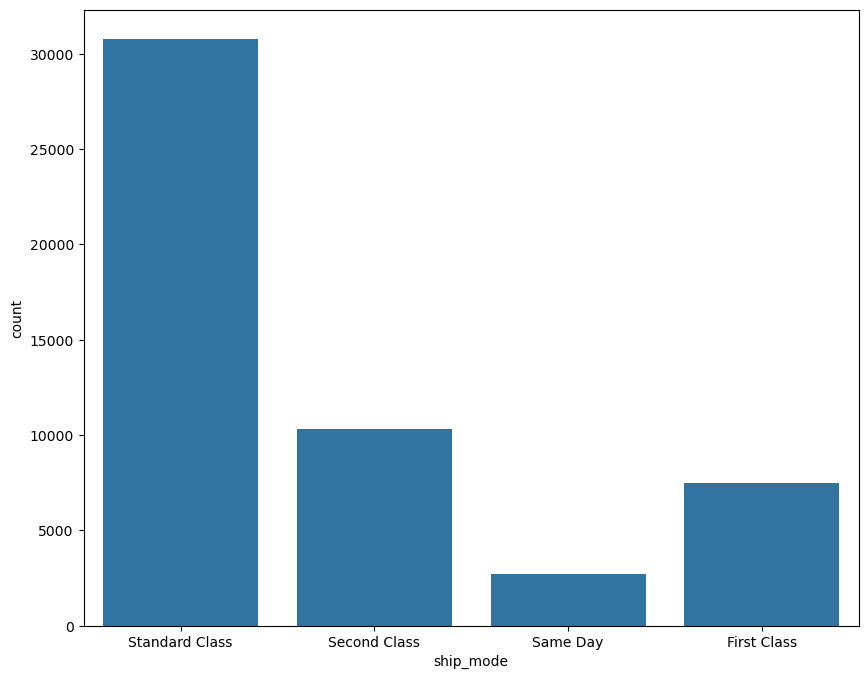

In [65]:
 # Setting the figure size
plt.figure(figsize=(10, 8))
# countplot: Show the counts of observations in each categorical bin using bars
sns.countplot(x='ship_mode', data=df)
# Display the figure
plt.show()

# standard class is the most preferred ship mode.
12. WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?

In [70]:
 # Grouping products by Category and Sub-Category
cat_subcat = pd.DataFrame(df.groupby(['category', 'sub_category'])['profit'].
sum())
# Sorting the values
cat_subcat.sort_values(['category','profit'], ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

In [74]:
df

order_id order_date  ship_date       ship_mode  \
0         AG-2011-2040 2011-01-01 2011-01-06  Standard Class   
1        IN-2011-47883 2011-01-01 2011-01-08  Standard Class   
2         HU-2011-1220 2011-01-01 2011-01-05    Second Class   
3      IT-2011-3647632 2011-01-01 2011-01-05    Second Class   
4        IN-2011-47883 2011-01-01 2011-01-08  Standard Class   
...                ...        ...        ...             ...   
51285   CA-2014-115427 2014-12-31 2015-01-04  Standard Class   
51286     MO-2014-2560 2014-12-31 2015-01-05  Standard Class   
51287   MX-2014-110527 2014-12-31 2015-01-02    Second Class   
51288   MX-2014-114783 2014-12-31 2015-01-06  Standard Class   
51289   CA-2014-156720 2014-12-31 2015-01-04  Standard Class   

          customer_name      segment             state        country  market  \
0       Toby Braunhardt     Consumer       Constantine        Algeria  Africa   
1           Joseph Holt     Consumer   New South Wales      Australia    APAC   
2         Annie Thurman     Consumer          Budapest        Hungary    EMEA   
3          Eugene Moren  Home Office         Stockholm         Sweden      EU   
4           Joseph Holt     Consumer   New South Wales      Australia    APAC   
...                 ...          ...               ...            ...     ...   
51285        Erica Bern    Corporate        California  United States      US   
51286         Liz Preis     Consumer  Souss-Massa-Draâ        Morocco  Africa   
51287  Charlotte Melton     Consumer           Managua      Nicaragua   LATAM   
51288     Tamara Dahlen     Consumer         Chihuahua         Mexico   LATAM   
51289     Jill Matthias     Consumer          Colorado  United States      US   

        region  ... sub_category  \
0       Africa  ...      Storage   
1      Oceania  ...     Supplies   
2         EMEA  ...      Storage   
3        North  ...        Paper   
4      Oceania  ...  Furnishings   
...        ...  ...          ...   
51285     West  ...      Binders   
51286   Africa  ...      Binders   
51287  Central  ...       Labels   
51288    North  ...       Labels   
51289     West  ...    Fasteners   

                                          product_name    sales quantity  \
0                                  Tenex Lockers, Blue  408.300        2   
1                             Acme Trimmer, High Speed  120.366        3   
2                              Tenex Box, Single Width   66.120        4   
3                          Enermax Note Cards, Premium   44.865        3   
4                           Eldon Light Bulb, Duo Pack  113.670        5   
...                                                ...      ...      ...   
51285  Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl   13.904        2   
51286          Wilson Jones Hole Reinforcements, Clear    3.990        1   
51287           Hon Color Coded Labels, 5000 Label Set   26.400        3   
51288           Hon Legal Exhibit Labels, Alphabetical    7.120        1   
51289                              Bagged Rubber Bands    3.024        3   

       discount    profit  shipping_cost  order_priority  year month_year  
0           0.0  106.1400         35.460          Medium  2011    2011-01  
1           0.1   36.0360          9.720          Medium  2011    2011-01  
2           0.0   29.6400          8.170            High  2011    2011-01  
3           0.5  -26.0550          4.820            High  2011    2011-01  
4           0.1   37.7700          4.700          Medium  2011    2011-01  
...         ...       ...            ...             ...   ...        ...  
51285       0.2    4.5188          0.890          Medium  2014    2014-12  
51286       0.0    0.4200          0.490          Medium  2014    2014-12  
51287       0.0   12.3600          0.350          Medium  2014    2014-12  
51288       0.0    0.5600          0.199          Medium  2014    2014-12  
51289       0.2   -0.6048          0.170          Medium  2014    2014-12  

[51290 rows x

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [76]:
# to covert the object data type into date time format

df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [78]:
# to get the monthly total sales

monthly_sales = df.resample('ME', on='order_date')['sales'].sum() # we use 'ME' instead of 'M' due to it will be removed in future version.
monthly_sales

order_date
2011-01-31     98898.48886
2011-02-28     91152.15698
2011-03-31    145729.36736
2011-04-30    116915.76418
2011-05-31    146747.83610
2011-06-30    215207.38022
2011-07-31    115510.41912
2011-08-31    207581.49122
2011-09-30    290214.45534
2011-10-31    199071.26404
2011-11-30    298496.53752
2011-12-31    333925.73460
2012-01-31    135780.72024
2012-02-29    100510.21698
2012-03-31    163076.77116
2012-04-30    161052.26952
2012-05-31    208364.89124
2012-06-30    256175.69842
2012-07-31    145236.78512
2012-08-31    303142.94238
2012-09-30    289389.16564
2012-10-31    252939.85020
2012-11-30    323512.41690
2012-12-31    338256.96660
2013-01-31    199185.90738
2013-02-28    167239.65040
2013-03-31    198594.03012
2013-04-30    177821.31684
2013-05-31    260498.56470
2013-06-30    396519.61190
2013-07-31    229928.95200
2013-08-31    326488.78936
2013-09-30    376619.24568
2013-10-31    293406.64288
2013-11-30    373989.36010
2013-12-31    405454.37802
2014-01-31    241

In [79]:
# to get yearly total sales

yearly_sales = df.resample('YE',on='order_date')['sales'].sum() # we use 'YE' instead of 'Y' due to it will be removed in future version.
yearly_sales

order_date
2011-12-31    2.259451e+06
2012-12-31    2.677439e+06
2013-12-31    3.405746e+06
2014-12-31    4.299866e+06
Freq: YE-DEC, Name: sales, dtype: float64

In [80]:
# to get the montly total profit

monthly_profit = df.resample('ME',on='order_date')['profit'].sum()
monthly_profit

order_date
2011-01-31     8321.80096
2011-02-28    12417.90698
2011-03-31    15303.56826
2011-04-30    12902.32438
2011-05-31    12183.82870
2011-06-30    23415.24702
2011-07-31     5585.00352
2011-08-31    23713.66772
2011-09-30    35776.88394
2011-10-31    25963.41834
2011-11-30    32709.17772
2011-12-31    40647.98400
2012-01-31    10401.63764
2012-02-29    15000.09618
2012-03-31    17992.91756
2012-04-30    17366.96722
2012-05-31    29876.70374
2012-06-30    34407.15362
2012-07-31    15585.38842
2012-08-31    43573.87858
2012-09-30    27776.18034
2012-10-31    30662.88270
2012-11-30    31820.72180
2012-12-31    32950.75130
2013-01-31    26810.55968
2013-02-28    25340.02610
2013-03-31    23433.77462
2013-04-30    19462.03844
2013-05-31    28495.69410
2013-06-30    45478.41340
2013-07-31    28863.82720
2013-08-31    31023.66846
2013-09-30    38905.66778
2013-10-31    42433.22258
2013-11-30    48062.99670
2013-12-31    50202.87112
2014-01-31    28001.38626
2014-02-28    19751.69996
2

In [81]:
# to get yearly profit

yearly_profit = df.resample('YE',on='order_date')['profit'].sum()
yearly_profit

order_date
2011-12-31    248940.81154
2012-12-31    307415.27910
2013-12-31    408512.76018
2014-12-31    504165.97046
Freq: YE-DEC, Name: profit, dtype: float64

In [82]:
df['sales']<250

0        False
1         True
2         True
3         True
4         True
         ...  
51285     True
51286     True
51287     True
51288     True
51289     True
Name: sales, Length: 51290, dtype: bool

In [83]:
df[df['sales']<250]

order_id order_date  ship_date       ship_mode  \
1        IN-2011-47883 2011-01-01 2011-01-08  Standard Class   
2         HU-2011-1220 2011-01-01 2011-01-05    Second Class   
3      IT-2011-3647632 2011-01-01 2011-01-05    Second Class   
4        IN-2011-47883 2011-01-01 2011-01-08  Standard Class   
5        IN-2011-47883 2011-01-01 2011-01-08  Standard Class   
...                ...        ...        ...             ...   
51285   CA-2014-115427 2014-12-31 2015-01-04  Standard Class   
51286     MO-2014-2560 2014-12-31 2015-01-05  Standard Class   
51287   MX-2014-110527 2014-12-31 2015-01-02    Second Class   
51288   MX-2014-114783 2014-12-31 2015-01-06  Standard Class   
51289   CA-2014-156720 2014-12-31 2015-01-04  Standard Class   

          customer_name      segment             state        country  market  \
1           Joseph Holt     Consumer   New South Wales      Australia    APAC   
2         Annie Thurman     Consumer          Budapest        Hungary    EMEA   
3          Eugene Moren  Home Office         Stockholm         Sweden      EU   
4           Joseph Holt     Consumer   New South Wales      Australia    APAC   
5           Joseph Holt     Consumer   New South Wales      Australia    APAC   
...                 ...          ...               ...            ...     ...   
51285        Erica Bern    Corporate        California  United States      US   
51286         Liz Preis     Consumer  Souss-Massa-Draâ        Morocco  Africa   
51287  Charlotte Melton     Consumer           Managua      Nicaragua   LATAM   
51288     Tamara Dahlen     Consumer         Chihuahua         Mexico   LATAM   
51289     Jill Matthias     Consumer          Colorado  United States      US   

        region  ... sub_category  \
1      Oceania  ...     Supplies   
2         EMEA  ...      Storage   
3        North  ...        Paper   
4      Oceania  ...  Furnishings   
5      Oceania  ...        Paper   
...        ...  ...          ...   
51285     West  ...      Binders   
51286   Africa  ...      Binders   
51287  Central  ...       Labels   
51288    North  ...       Labels   
51289     West  ...    Fasteners   

                                          product_name    sales quantity  \
1                             Acme Trimmer, High Speed  120.366        3   
2                              Tenex Box, Single Width   66.120        4   
3                          Enermax Note Cards, Premium   44.865        3   
4                           Eldon Light Bulb, Duo Pack  113.670        5   
5              Eaton Computer Printout Paper, 8.5 x 11   55.242        2   
...                                                ...      ...      ...   
51285  Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl   13.904        2   
51286          Wilson Jones Hole Reinforcements, Clear    3.990        1   
51287           Hon Color Coded Labels, 5000 Label Set   26.400        3   
51288           Hon Legal Exhibit Labels, Alphabetical    7.120        1   
51289                              Bagged Rubber Bands    3.024        3   

       discount   profit  shipping_cost  order_priority  year month_year  
1           0.1  36.0360          9.720          Medium  2011    2011-01  
2           0.0  29.6400          8.170            High  2011    2011-01  
3           0.5 -26.0550          4.820            High  2011    2011-01  
4           0.1  37.7700          4.700          Medium  2011    2011-01  
5           0.1  15.3420          1.800          Medium  2011    2011-01  
...         ...      ...            ...             ...   ...        ...  
51285       0.2   4.5188          0.890          Medium  2014    2014-12  
51286       0.0   0.4200          0.490          Medium  2014    2014-12  
51287       0.0  12.3600          0.350          Medium  2014    2014-12  
51288       0.0   0.5600          0.199          Medium  2014    2014-12  
51289       0.2  -0.6048          0.170          Medium  2014    2014-12  

[38427 rows x 22 columns]

In [84]:
df['region'][df['sales']<250]

1        Oceania
2           EMEA
3          North
4        Oceania
5        Oceania
          ...   
51285       West
51286     Africa
51287    Central
51288      North
51289       West
Name: region, Length: 38427, dtype: object

In [85]:
df['sales'][df['sales']<250]

1        120.366
2         66.120
3         44.865
4        113.670
5         55.242
          ...   
51285     13.904
51286      3.990
51287     26.400
51288      7.120
51289      3.024
Name: sales, Length: 38427, dtype: float64

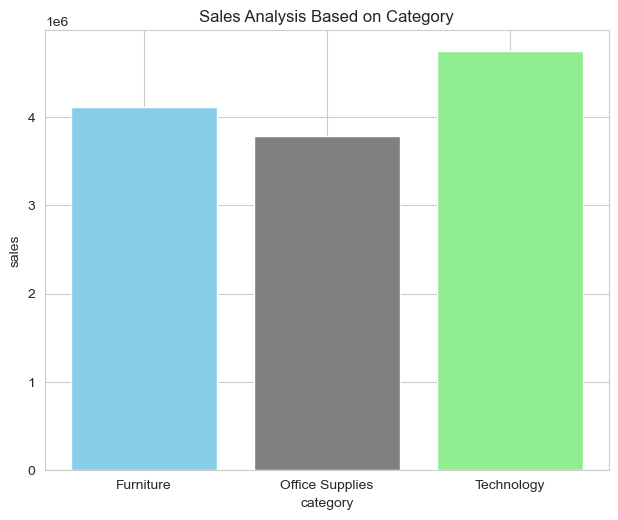

In [89]:
# to create a space with grid and create subplots with charts in it

plt.figure(figsize=(16,40))
sns.set_style('whitegrid')

# to create a barchart

plt.subplot(6,2,1)
bar_color = ['skyblue','grey','lightgreen']
Sales_analysis = df.groupby('category')['sales'].sum()
plt.bar(Sales_analysis.index,Sales_analysis.values,color=bar_color) # to make it in horizontal just add h with bar ==> (barh)
plt.title('Sales Analysis Based on Category')
plt.xlabel('category')
plt.ylabel('sales')
plt.show()

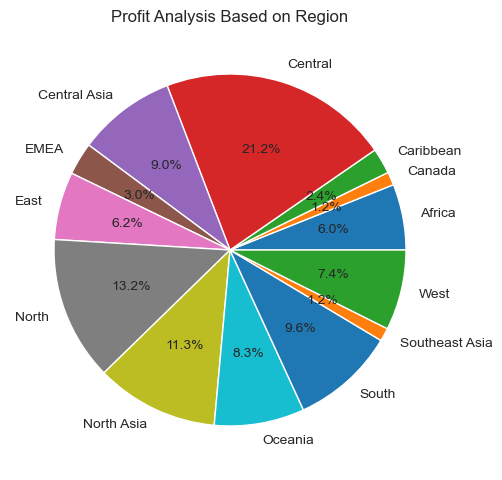

In [92]:
# to create a piechart
plt.figure(figsize=(16,40))
sns.set_style('whitegrid')
plt.subplot(6,2,2)
profit_anlaysis = df.groupby('region')['profit'].sum()
plt.pie(profit_anlaysis.values,labels=profit_anlaysis.index,autopct="%0.1f%%")
plt.title('Profit Analysis Based on Region')
plt.show()

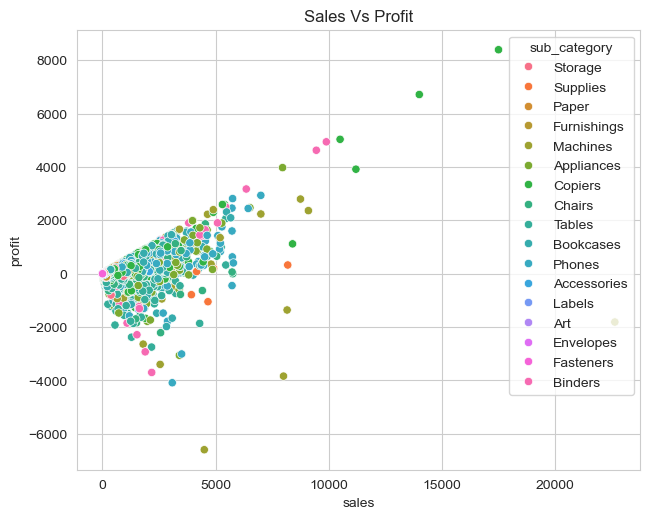

In [97]:
plt.figure(figsize=(16,40))
sns.set_style('whitegrid')
plt.subplot(6,2,3)
sns.scatterplot(data=df,x='sales',y='profit',hue='sub_category')
plt.title('Sales Vs Profit')
plt.show()

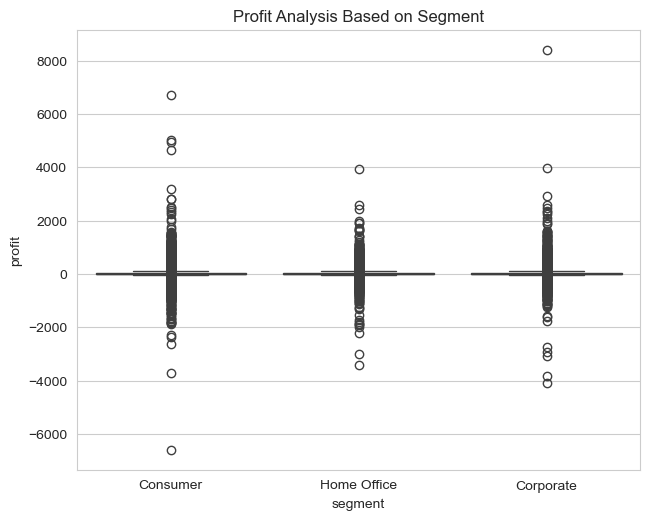

In [100]:
# to create a boxplot
plt.figure(figsize=(16,40))
sns.set_style('whitegrid')
plt.subplot(6,2,4)
sns.boxplot(data=df,x='segment',y='profit')
plt.title('Profit Analysis Based on Segment')
plt.show()

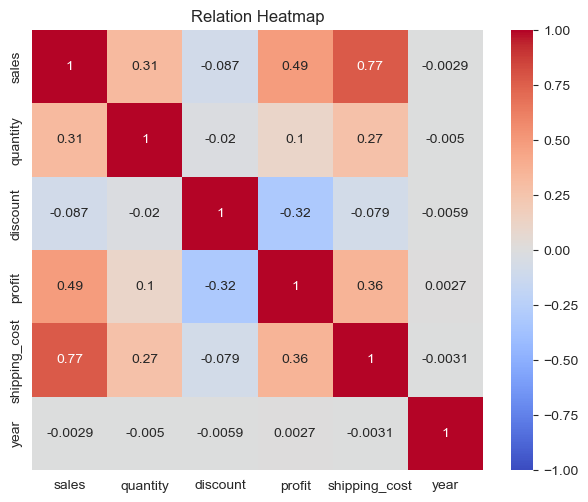

In [110]:
plt.figure(figsize=(16,40))
sns.set_style('whitegrid')
# to create a heatmap
plt.subplot(6,2,5)
sns.heatmap(df.corr(numeric_only=True),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.title('Relation Heatmap')
plt.show()

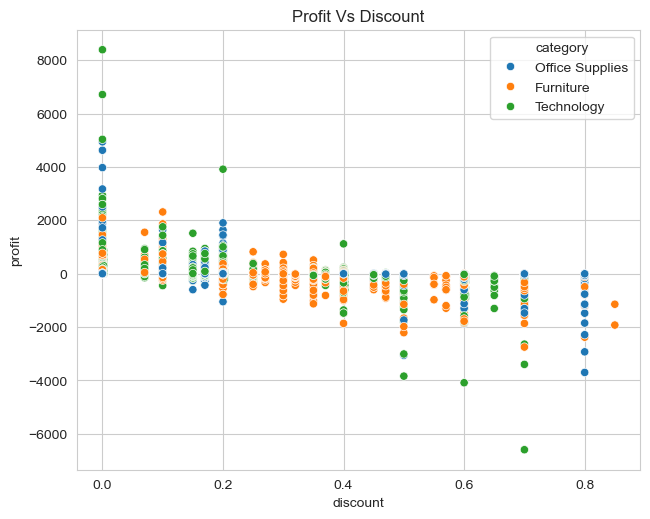

In [111]:
plt.figure(figsize=(16,40))
sns.set_style('whitegrid')
# to create a scatterplot

plt.subplot(6,2,6)
sns.scatterplot(data=df,x='discount',y='profit',hue='category')
plt.title('Profit Vs Discount')
plt.show()

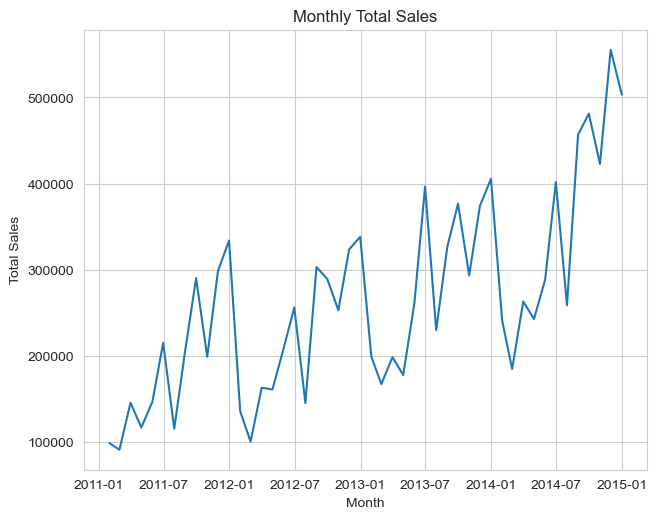

In [112]:
plt.figure(figsize=(16,40))
sns.set_style('whitegrid')
# to create a line plot

plt.subplot(6,2,7)
monthly_profit = df.resample('ME',on='order_date')['sales'].sum()
plt.plot(monthly_profit.index,monthly_profit.values)
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

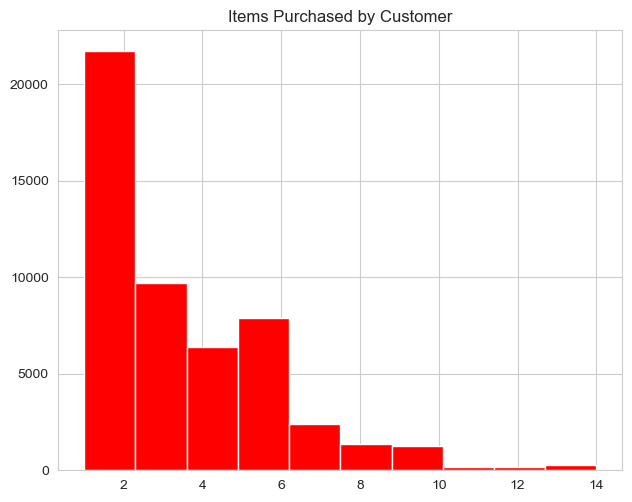

In [118]:
plt.figure(figsize=(16,40))
sns.set_style('whitegrid')
# to create a histogram

plt.subplot(6,2,8)
plt.hist(df['quantity'],bins=10,color='red')
plt.title('Items Purchased by Customer')
plt.show()

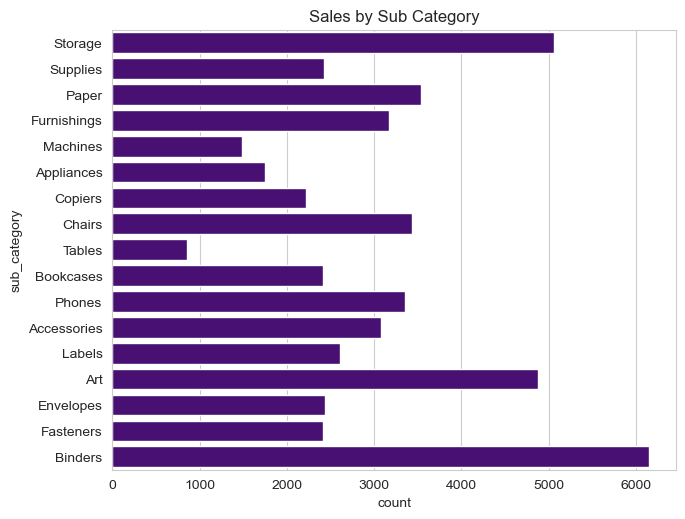

In [119]:
plt.figure(figsize=(16,40))
sns.set_style('whitegrid')
# to create a countplot

plt.subplot(6,2,9)
sns.countplot(df['sub_category'],color='indigo')
plt.title('Sales by Sub Category')

plt.show()

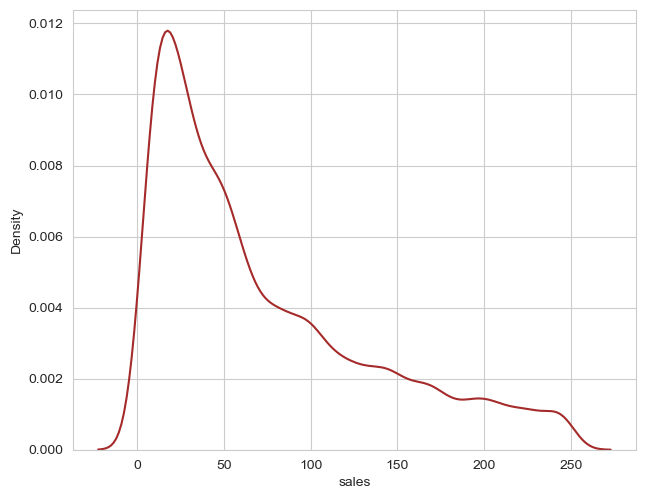

In [121]:
plt.figure(figsize=(16,40))
sns.set_style('whitegrid')
plt.subplot(6,2,11)
sns.kdeplot(df['sales'][df['sales']<250],color='brown')

plt.show()

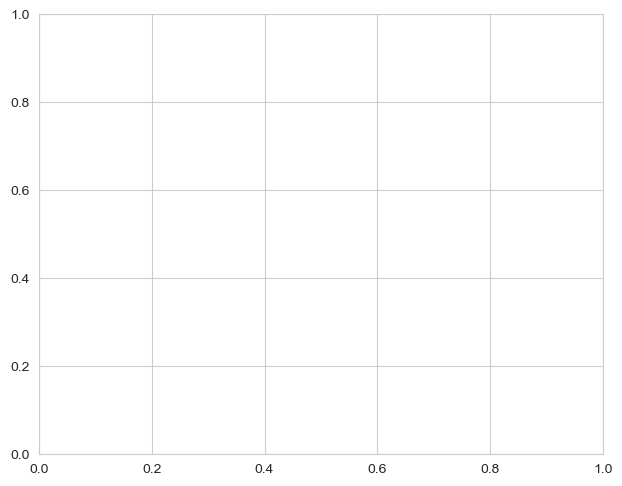

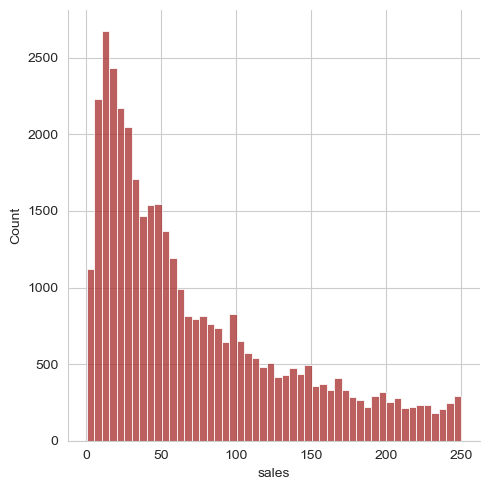

In [122]:
plt.figure(figsize=(16,40))
sns.set_style('whitegrid')
plt.subplot(6,2,12)
sns.displot(df['sales'][df['sales']<250],color='brown')
plt.show()

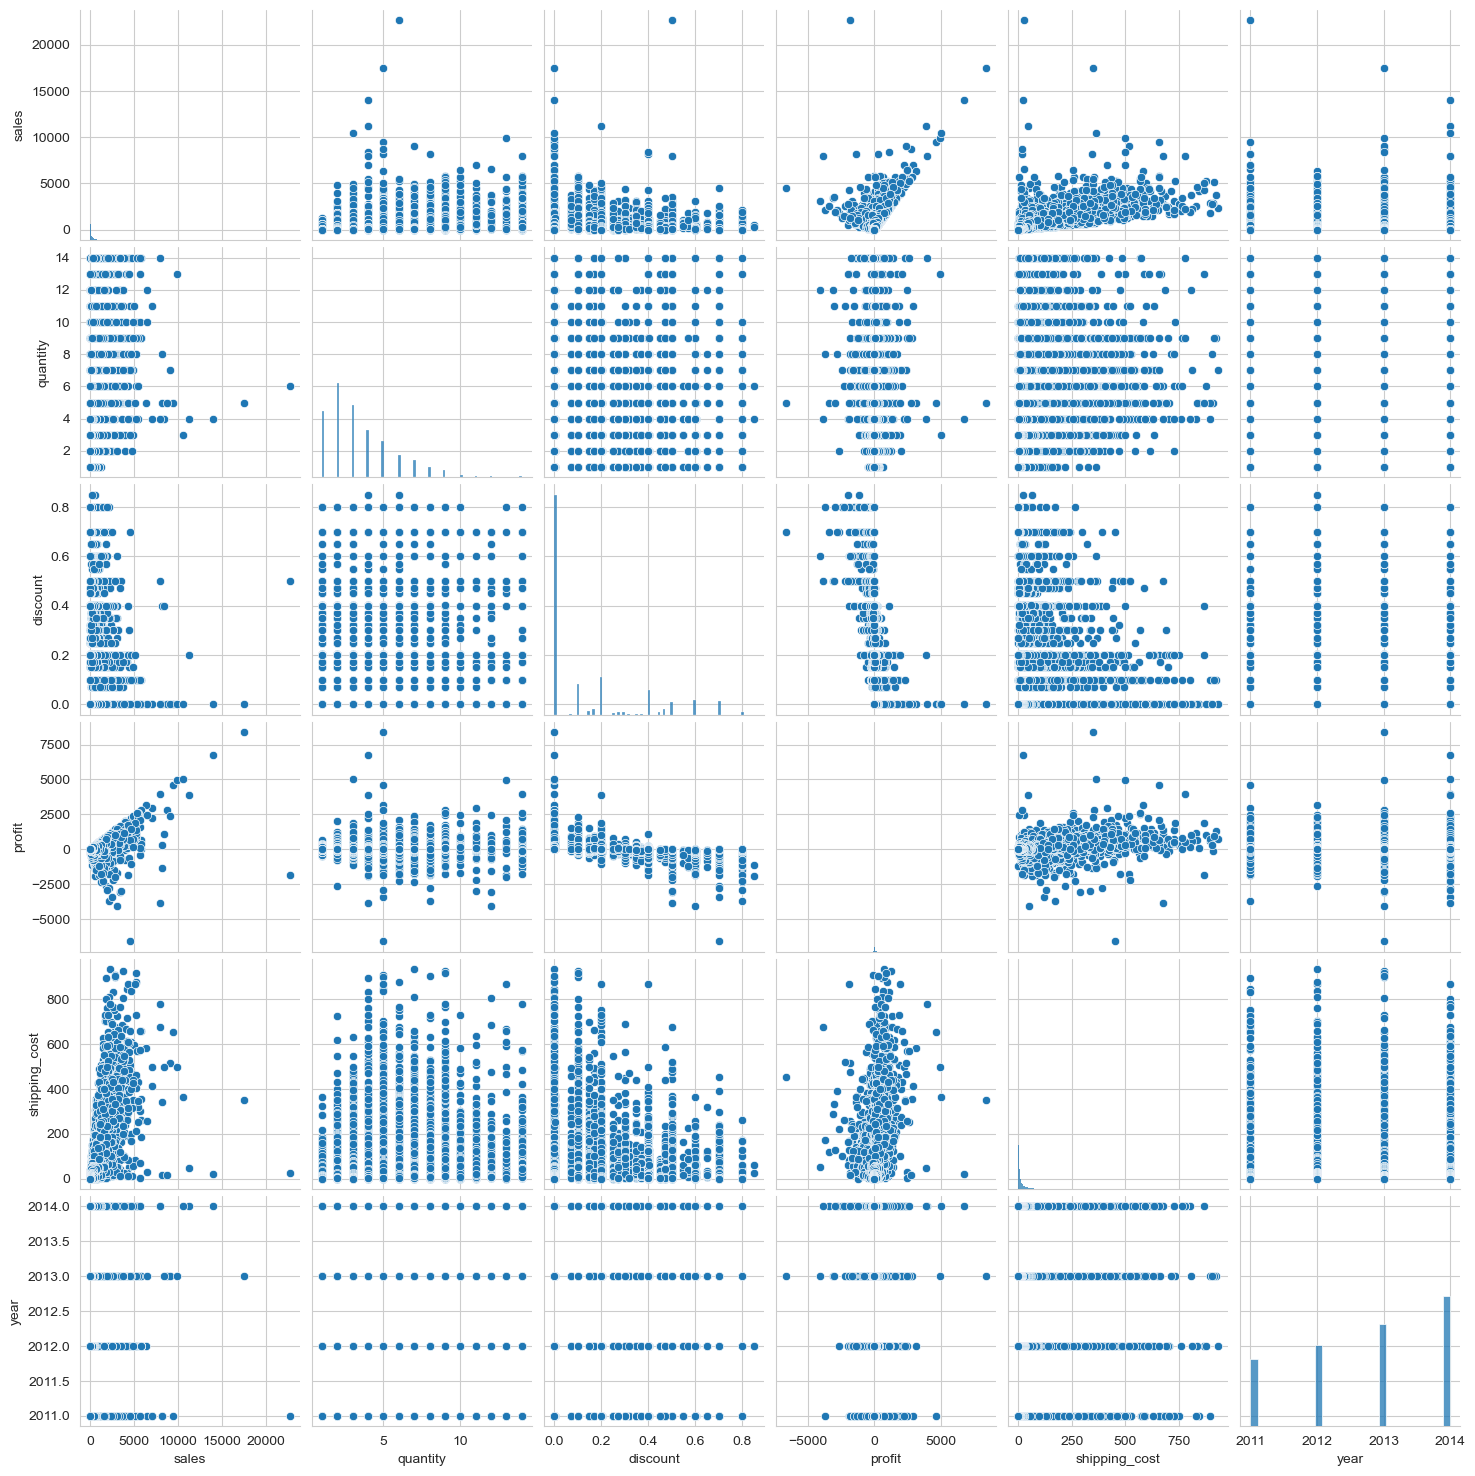

In [123]:
# to get a pairplot of the full dataframe

sns.pairplot(df)
plt.show()

## Qns?

Objective: Find out if the type of customer (Segment) is associated with their shipping preference (Ship Mode).

Problem Statement:
Superstore wants to know if certain customer segments prefer specific shipping methods. Understanding this can help optimize delivery strategies.

Hypotheses:
Null Hypothesis (H₀): There is no relationship between customer segment and shipping mode. They are independent.

Alternative Hypothesis (H₁): There is a relationship between customer segment and shipping mode. They are dependent.

Why use this?
We are comparing two categorical variables: Segment and Ship Mode.

The Chi-Square test helps us determine if the observed frequencies differ significantly from the expected frequencies.
    

In [124]:
# to create a contingency table for segment & ship mode

contingency=pd.crosstab(df['segment'],df['ship_mode'])
contingency

ship_mode    First Class  Same Day  Second Class  Standard Class
segment                                                         
Consumer            3918      1467          5257           15876
Corporate           2245       728          3198            9258
Home Office         1342       506          1854            5641

In [125]:
# to get the values for ch-square stats,p-value,degree of freedom,excepted

chi2_stats,p_value,dof,excepted = st.chi2_contingency(contingency)

print('Chi-Square Statistics : ',round(chi2_stats,4))
print('P-Value : ',round(p_value,4))
print('Degree of Freedom : ',dof)

# to check is it accept H0 or Reject H0 , based on the p_value

alpha=0.05

if p_value < alpha:
    print('Conclusion : Reject H0 , There is a relationship between customer segment and shipping mode. They are dependent.')
else:
    print('Conclusion : Fail to Reject H0 , There is no relationship between customer segment and shipping mode. They are independent.')

NameError: name 'st' is not defined